In [1]:
import bbox
import numpy as np

In [2]:
box1 = bbox.BBox2D([100., 100., 200., 200.], mode=bbox.XYXY)
box2 = bbox.BBox2D([120., 120., 220., 220.], mode=bbox.XYXY)

In [3]:
bbox.metrics.iou_2d(box1, box2)

0.47402644317607107

In [4]:
import paddle
paddle.to_tensor(box1.numpy(mode=bbox.XYXY))

Tensor(shape=[4], dtype=float64, place=CUDAPlace(0), stop_gradient=True,
       [100., 100., 200., 200.])

## 数据准备

In [5]:
import paddle
import pandas as pd

In [6]:
class MyDataset(paddle.io.Dataset):
    def __init__(self, is_train=True):
        super().__init__()
        self.is_train = is_train
        self.folder = './data/bananas_train/' if is_train else './data/bananas_val/'
        self.labels = pd.read_csv(self.folder + 'label.csv').to_dict(orient='records')
        self.trans = paddle.vision.transforms.Compose([
            paddle.vision.transforms.ToTensor()
        ])

    def __getitem__(self, idx):
        cur_label = self.labels[idx]
        cur_img_name = cur_label['img_name']
        image = paddle.vision.image_load(self.folder + 'images/' + cur_img_name, backend='cv2')
        image = self.trans(image)
        label = [cur_label['label'], cur_label['xmin'], cur_label['ymin'], cur_label['xmax'], cur_label['ymax']]
        label = paddle.unsqueeze(paddle.to_tensor(label), axis=0) / 256.0
        return image, label

    def __len__(self):
        return len(self.labels)

batch_size = 32
train_dl = paddle.io.DataLoader(MyDataset(is_train=True), shuffle=True, batch_size=batch_size)
val_dl = paddle.io.DataLoader(MyDataset(is_train=False), shuffle=False, batch_size=batch_size)

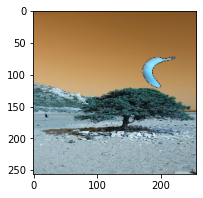

Tensor(shape=[1, 5], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [[0.        , 0.66796875, 0.28515625, 0.87109375, 0.47265625]])

In [33]:
def show_one_image(image):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.show()

cur = next(iter(train_dl))
cur_images = cur[0].transpose([0, 2, 3, 1])
cur_labels = cur[1]
show_one_image(cur_images[1])
cur_labels[1]